In [1]:
import pandas as pd
import numpy as np
import os
import tensorflow as tf
import cv2
from PIL import Image
from tensorflow import keras
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.layers import Activation, Dense, Dropout
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Flatten
from sklearn.metrics import classification_report,confusion_matrix
import random
import csv
%matplotlib inline

Using TensorFlow backend.


Image Classification with 24 classes

In [2]:
path = r'C:\Users\ekantzola\MultiClassClassification\dataset'
image_size = 224

classes = []
for category in os.listdir(path):
    classes.append(category)

    
data = [] #contains resized images with their corresponding label 
for c in classes:
    label = classes.index(c) # label refers to the position in which 'c' occurs in the list
    images = os.listdir(os.path.join(path,c))
    for i in images:
        img = cv2.imread(os.path.join(path,c,i))[...,::-1]
        resized_img = cv2.resize(img, (image_size, image_size))
        data.append([resized_img,label])

In [3]:
Features = []
labels = []

for feature, label in data:
    Features.append(feature)
    labels.append(label)

In [4]:
from sklearn.model_selection import train_test_split

'''
1. Split the dataset to training and test set; test set will be 20% of the dataset
2. Split the training set to training and validation test; validation ser will be 20% of the training set
'''

X_train, X_test, y_train, y_test = train_test_split(Features, labels, test_size=0.2)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)

Data Normalization
---------------------------

In [5]:
X_train = np.array(X_train)
X_test = np.array(X_test)
X_val = np.array(X_val)
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255
X_val = X_val.astype('float32') / 255

y_train = np.array(y_train)
y_test = np.array(y_test)
y_val = np.array(y_val)

Create the CNN architecture
----------------------------------------

Kernel Size --> (3,3)

Input Shape --> (224,224,3)

Activation function --> ReLU

In [6]:
num_classes = 24

model = Sequential()
model.add(Conv2D(32,kernel_size = (3,3), input_shape=(224,224,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32,kernel_size =(3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, kernel_size =(3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation = 'softmax'))


model.summary() # display the summary of the network

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 109, 109, 32)      9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 54, 54, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 52, 52, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 26, 26, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 26, 26, 64)       

Parameters:

- Optimizer: Adam
- Learning Rate: 0.001
- Loss: 'sparse_categorical_crossentropy'
- Activation function: softmax
- Epochs: 10
- Batch Size: 32

In [7]:
optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001)
model.compile(optimizer= optimizer, loss= 'sparse_categorical_crossentropy', metrics= ['accuracy'])

In [8]:
batch_size = 32
epochs = 10

history = model.fit(X_train, y_train,
                    epochs= epochs,
                    batch_size=batch_size,
                    validation_data=(X_val, y_val))

Train on 7286 samples, validate on 1822 samples
Epoch 1/10
7286/7286 [==============================] - 462s 63ms/step - loss: 1.8076 - accuracy: 0.4816 - val_loss: 0.9178 - val_accuracy: 0.7168
Epoch 2/10
7286/7286 [==============================] - 456s 63ms/step - loss: 0.9822 - accuracy: 0.7094 - val_loss: 0.6984 - val_accuracy: 0.7750
Epoch 3/10
7286/7286 [==============================] - 452s 62ms/step - loss: 0.7362 - accuracy: 0.7761 - val_loss: 0.6163 - val_accuracy: 0.8030
Epoch 4/10
7286/7286 [==============================] - 495s 68ms/step - loss: 0.6221 - accuracy: 0.8102 - val_loss: 0.5880 - val_accuracy: 0.8293
Epoch 5/10
7286/7286 [==============================] - 521s 72ms/step - loss: 0.5120 - accuracy: 0.8416 - val_loss: 0.5372 - val_accuracy: 0.8348
Epoch 6/10
7286/7286 [==============================] - 507s 70ms/step - loss: 0.3992 - accuracy: 0.8706 - val_loss: 0.5521 - val_accuracy: 0.8436
Epoch 7/10
7286/7286 [==============================] - 500s 69ms/step

In [9]:
score, acc = model.evaluate(X_test, y_test, batch_size=batch_size)
print("Test score is:", score)
print("Test accuracy is:", acc)

2277/2277 [==============================] - 45s 20ms/step
Test score is: 0.5784208704412742
Test accuracy is: 0.8726394176483154


In [10]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

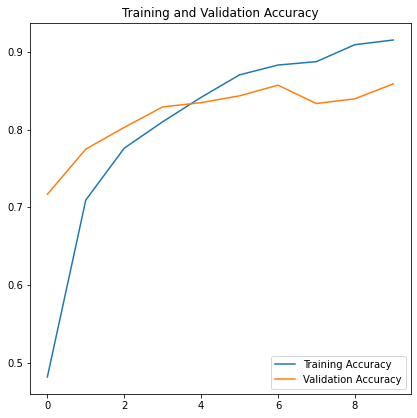

In [12]:
epochs_range = range(epochs)

plt.figure(figsize=(15,15))
plt.subplot(2,2,1)
plt.plot(epochs_range, acc, label= 'Training Accuracy')
plt.plot(epochs_range, val_acc, label= 'Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.show()

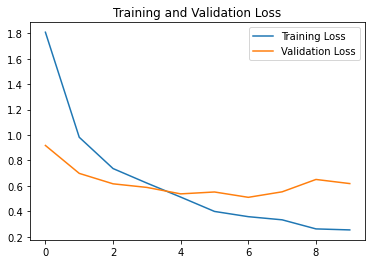

In [13]:
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [14]:
predictions = model.predict_classes(X_test)
predictions = predictions.reshape(1,-1)[0]
print(classification_report(y_test, predictions, target_names = classes))

              precision    recall  f1-score   support

 black_dress       0.78      0.84      0.81        69
 black_pants       0.85      0.92      0.89       172
 black_shirt       0.89      0.90      0.89       150
 black_shoes       0.79      0.91      0.84       158
black_shorts       0.83      0.68      0.75        66
  blue_dress       0.96      0.86      0.91        88
  blue_pants       0.93      0.83      0.87       189
  blue_shirt       0.95      0.87      0.91       147
  blue_shoes       0.82      0.87      0.84       100
 blue_shorts       0.74      0.60      0.67        48
 brown_pants       0.84      0.88      0.86        72
 brown_shoes       0.75      0.95      0.84        75
brown_shorts       1.00      0.44      0.62         9
 green_pants       0.91      0.71      0.79        41
 green_shirt       1.00      0.98      0.99        47
 green_shoes       0.92      0.89      0.90        85
green_shorts       0.78      0.84      0.81        25
   red_dress       0.93    